In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
INPUT_NODE = 22
OUTPUT_NODE = 10

#梯度下降率
GDDOWN = 0.000001

#训练轮数
TRAINING_TIMES = 200

#每次训练数量
TRAINING_STEPS = 100

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 各个变量
x = tf.placeholder("float", shape=[None, INPUT_NODE])
y_ = tf.placeholder("float", shape=[None,OUTPUT_NODE])

W = tf.Variable(tf.zeros([INPUT_NODE, OUTPUT_NODE]))
b = tf.Variable(tf.zeros([OUTPUT_NODE]))

# 变量初始化
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)
# 初始化图
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 优化算法
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step =tf.train.GradientDescentOptimizer(GDDOWN).minimize(cross_entropy)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/final_train_data.csv', header = None)
df=df.replace('R',int(0))
df=df.replace('M',int(1))
data=df.values[1:]
data=data.astype(float)
X_train=data[:,0:22]
y_train=data[:,22]
y_train=y_train.astype(int)

df = pd.read_csv('data/final_test_data.csv', header = None)
df=df.replace('R',int(0))
df=df.replace('M',int(1))
data=df.values[1:]
data=data.astype(float)
X_test=data[:,0:22]
y_test=data[:,22]
y_test=y_test.astype(int)


y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)
sess1=tf.Session()
y_train, y_test = sess1.run([y_train,y_test])

In [4]:
history={'accuracy':[],'f_score':[]}

In [5]:
from sklearn.metrics import f1_score
for i in range(TRAINING_TIMES):
    # 训练
    batch_xs= X_train[i*TRAINING_STEPS:(i+1)*TRAINING_STEPS,:]
    batch_ys= y_train[i*TRAINING_STEPS:(i+1)*TRAINING_STEPS,:]
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    # 模型评估
    correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_, 1))
    accuracy =tf.reduce_mean(tf.cast(correct_prediction, "float"))
    pred = tf.argmax(y_, 1)
    true=tf.argmax(y,1)
    j = i+1
    print("第%d轮训练,训练个数%d个" % (j,j*TRAINING_STEPS))
    #print("正确率预测： " + correct_prediction + "\n")
    test_acc,y_pred,y_true=sess.run([accuracy,pred,true],feed_dict={x: X_test, y_:y_test})
    model_f1_score=f1_score(y_true,y_pred,average='micro')
    history['f_score'].append(model_f1_score)
    print( 'f1_score= "{:.9f}"'.format(model_f1_score))
    print("当前正确率： ")
    history['accuracy'].append(test_acc)
    print(test_acc)

第1轮训练,训练个数100个
f1_score= "0.196875000"
当前正确率： 
0.196875
第2轮训练,训练个数200个
f1_score= "0.206250000"
当前正确率： 
0.20625
第3轮训练,训练个数300个
f1_score= "0.312500000"
当前正确率： 
0.3125
第4轮训练,训练个数400个
f1_score= "0.343750000"
当前正确率： 
0.34375
第5轮训练,训练个数500个
f1_score= "0.384375000"
当前正确率： 
0.384375
第6轮训练,训练个数600个
f1_score= "0.462500000"
当前正确率： 
0.4625
第7轮训练,训练个数700个
f1_score= "0.468750000"
当前正确率： 
0.46875
第8轮训练,训练个数800个
f1_score= "0.525000000"
当前正确率： 
0.525
第9轮训练,训练个数900个
f1_score= "0.615625000"
当前正确率： 
0.615625
第10轮训练,训练个数1000个
f1_score= "0.700000000"
当前正确率： 
0.7
第11轮训练,训练个数1100个
f1_score= "0.703125000"
当前正确率： 
0.703125
第12轮训练,训练个数1200个
f1_score= "0.728125000"
当前正确率： 
0.728125
第13轮训练,训练个数1300个
f1_score= "0.800000000"
当前正确率： 
0.8
第14轮训练,训练个数1400个
f1_score= "0.800000000"
当前正确率： 
0.8
第15轮训练,训练个数1500个
f1_score= "0.800000000"
当前正确率： 
0.8
第16轮训练,训练个数1600个
f1_score= "0.800000000"
当前正确率： 
0.8
第17轮训练,训练个数1700个
f1_score= "0.800000000"
当前正确率： 
0.8
第18轮训练,训练个数1800个
f1_score= "0.800000000"
当前正确率： 
0.8
第19轮训练,训练个数1900个
f1

f1_score= "0.800000000"
当前正确率： 
0.8
第154轮训练,训练个数15400个
f1_score= "0.800000000"
当前正确率： 
0.8
第155轮训练,训练个数15500个
f1_score= "0.800000000"
当前正确率： 
0.8
第156轮训练,训练个数15600个
f1_score= "0.800000000"
当前正确率： 
0.8
第157轮训练,训练个数15700个
f1_score= "0.800000000"
当前正确率： 
0.8
第158轮训练,训练个数15800个
f1_score= "0.800000000"
当前正确率： 
0.8
第159轮训练,训练个数15900个
f1_score= "0.800000000"
当前正确率： 
0.8
第160轮训练,训练个数16000个
f1_score= "0.800000000"
当前正确率： 
0.8
第161轮训练,训练个数16100个
f1_score= "0.800000000"
当前正确率： 
0.8
第162轮训练,训练个数16200个
f1_score= "0.800000000"
当前正确率： 
0.8
第163轮训练,训练个数16300个
f1_score= "0.800000000"
当前正确率： 
0.8
第164轮训练,训练个数16400个
f1_score= "0.800000000"
当前正确率： 
0.8
第165轮训练,训练个数16500个
f1_score= "0.800000000"
当前正确率： 
0.8
第166轮训练,训练个数16600个
f1_score= "0.800000000"
当前正确率： 
0.8
第167轮训练,训练个数16700个
f1_score= "0.800000000"
当前正确率： 
0.8
第168轮训练,训练个数16800个
f1_score= "0.800000000"
当前正确率： 
0.8
第169轮训练,训练个数16900个
f1_score= "0.800000000"
当前正确率： 
0.8
第170轮训练,训练个数17000个
f1_score= "0.800000000"
当前正确率： 
0.8
第171轮训练,训练个数17100个
f1_score= 

In [6]:
# 构造绘图函数
from matplotlib import pyplot as plt
def drow(history):
    plt.figure()
    epochs = range(1, len(history['accuracy']) + 1)
    plt.plot(epochs, history['accuracy'], 'rx', label='accuracy')
    plt.plot(epochs, history['f_score'], 'b', label='f1_score')
    plt.title('acc and f1_score')
    plt.xlabel('Epochs')
    plt.ylabel('acc/f1_score')
    plt.legend()
    plt.show()

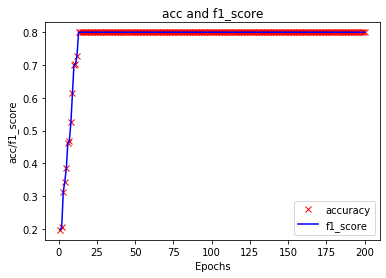

In [7]:
drow(history)